In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for Q-Q plots
import scipy.stats as stats
# boston house dataset for the demo
from sklearn.datasets import load_boston

In [2]:
# load the the Boston House price data
# load the boston dataset from sklearn
boston_dataset = load_boston()
# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM']]
boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [3]:
boston.shape

(506, 3)

In [4]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

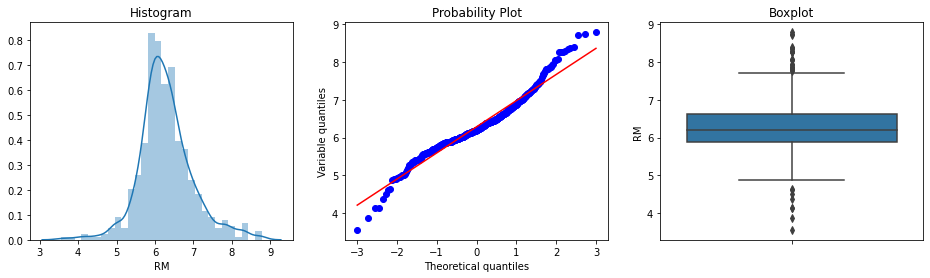

In [5]:
# let's find outliers in RM
diagnostic_plots(boston, 'RM')

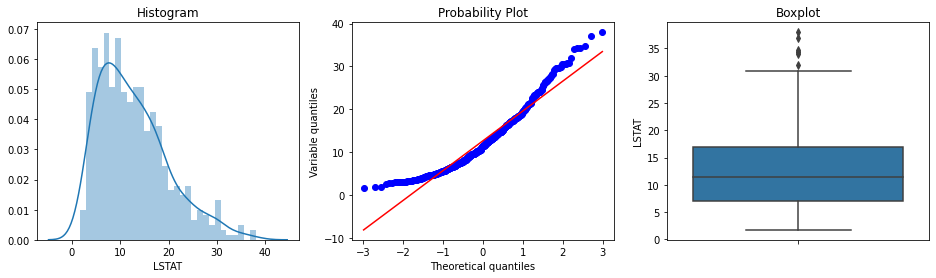

In [6]:
# visualise outliers in LSTAT
diagnostic_plots(boston, 'LSTAT')

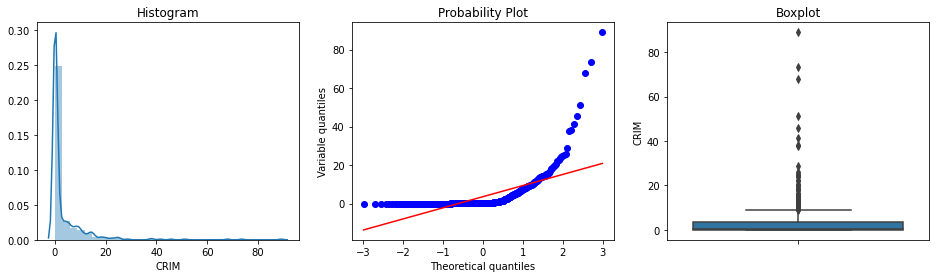

In [7]:
# outliers in CRIM
diagnostic_plots(boston, 'CRIM')

In [8]:
from feature_engine import outlier_removers as outr

In [9]:
cap=outr.OutlierTrimmer(distribution='skewed', tail='right', fold=1.5)

In [10]:
cap.fit(boston)

OutlierTrimmer(distribution='skewed', fold=1.5,
               variables=['RM', 'LSTAT', 'CRIM'])

In [11]:
data=cap.transform(boston)

In [12]:
data.head(3)

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729


In [13]:
data.shape

(417, 3)

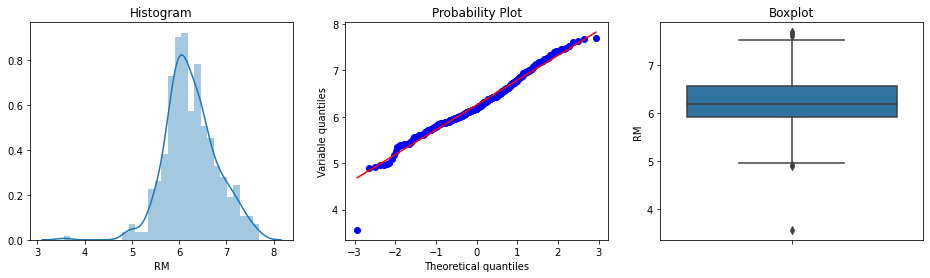

In [14]:
# let's find outliers in RM
diagnostic_plots(data, 'RM')

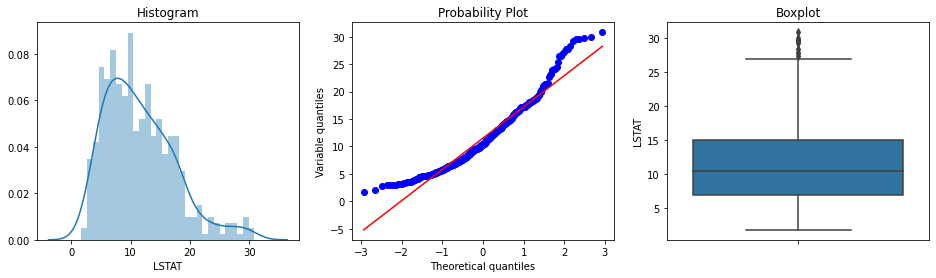

In [15]:
# visualise outliers in LSTAT
diagnostic_plots(data, 'LSTAT')

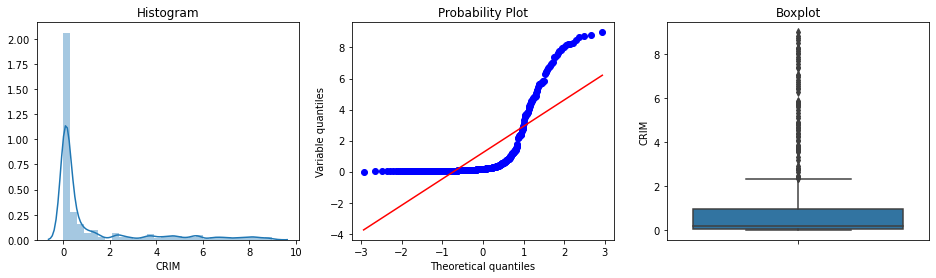

In [16]:
# outliers in CRIM
diagnostic_plots(data, 'CRIM')

For LSTAT and CRIM, we still see many outliers. When we remove data points from our dataset, all the parameters of the distribution are re-calculated, those are the mean, quantiles and inter-quantile range, therefore, in the new -trimmed- variable, values that before were not considered outliers, now are.

This is an unwanted characteristic of this way of coping with outliers.

In [17]:
cap.right_tail_caps_

{'RM': 7.730499999999999, 'LSTAT': 31.962500000000006, 'CRIM': 9.06963875}